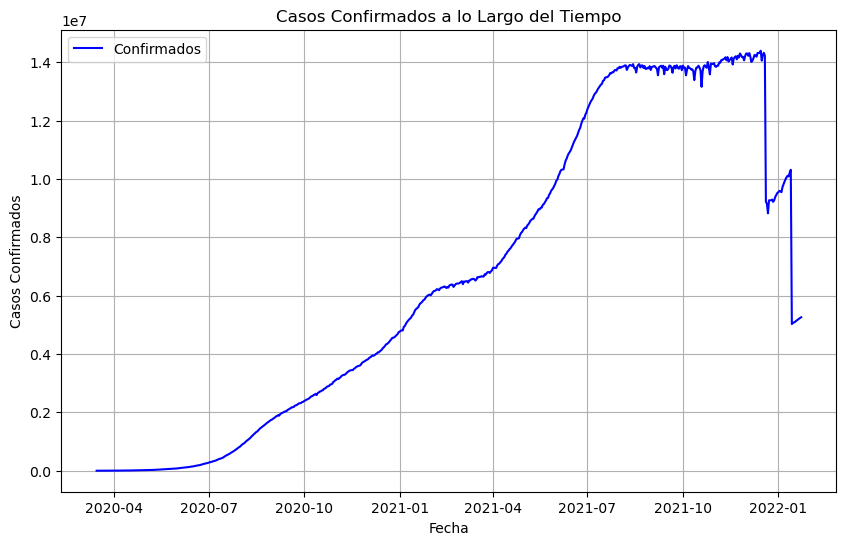

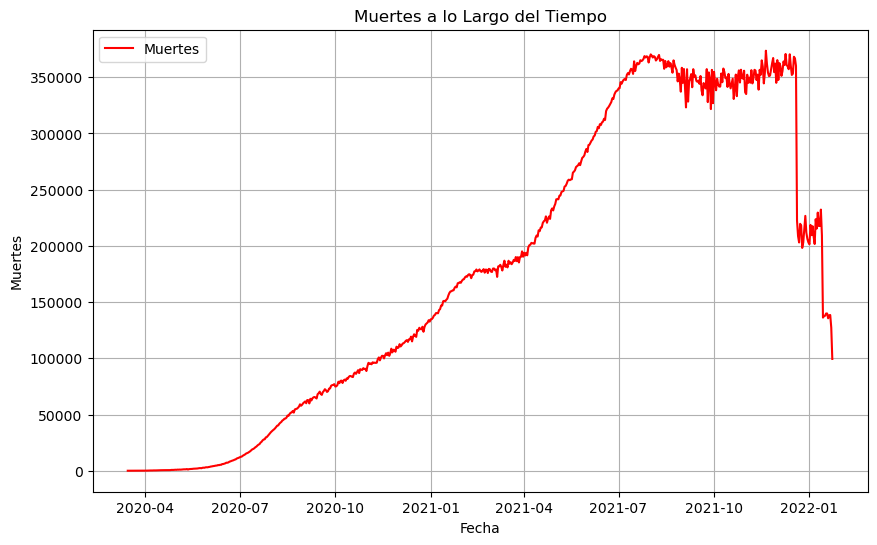

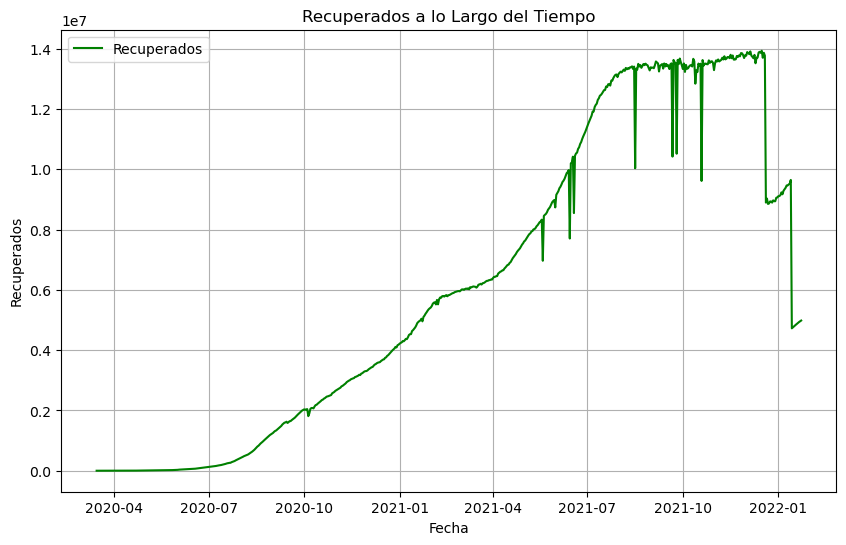

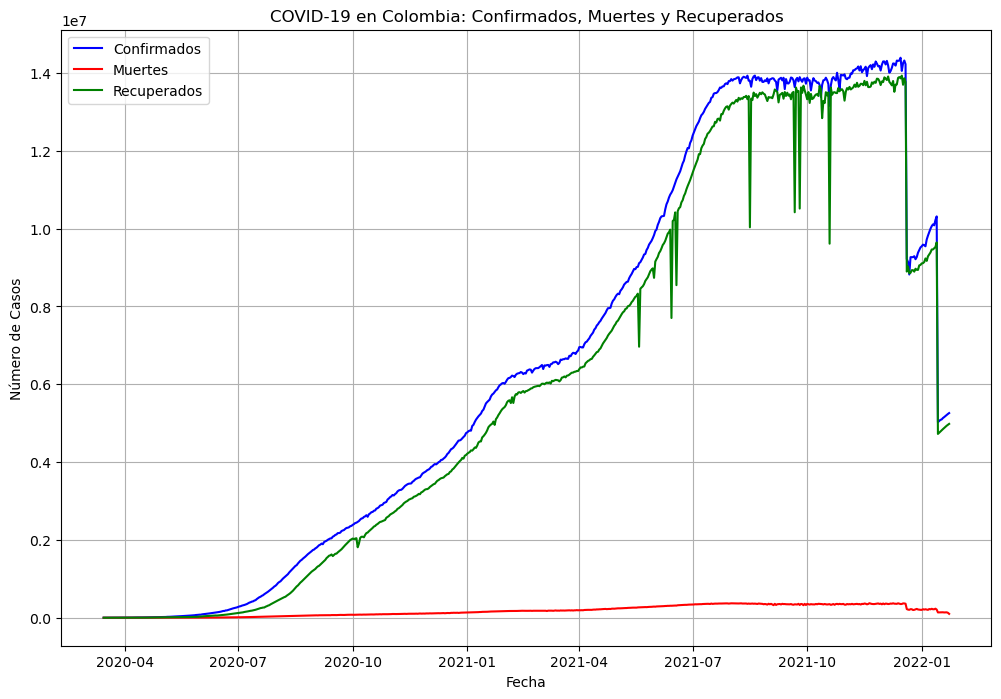

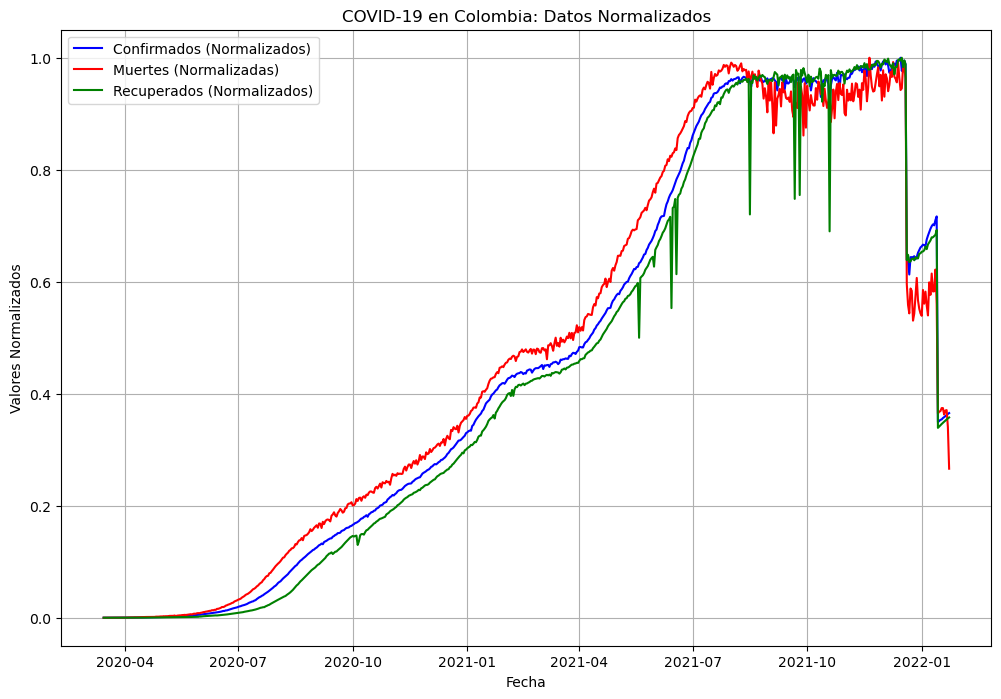

In [35]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

class CovidRepository:

    def __init__(self, url):
        self.__connection = sqlite3.connect(url)

    def get_data(self, country_code):
        try:
            query = f"""
                SELECT
                    t.date,
                    SUM(t.confirmed) AS total_confirmed,
                    SUM(t.deaths) AS total_deaths,
                    SUM(t.recovered) AS total_recovered
                FROM timeseries t
                WHERE t.id IN (
                    SELECT l.id
                    FROM location l
                    WHERE l.iso_alpha_2 = "{country_code}"
                )
                GROUP BY t.date
                ORDER BY t.date ASC;
            """
            cursor = self.__connection.cursor()
            cursor.execute(query)
            data = cursor.fetchall()
            columns = [description[0] for description in cursor.description]
            return data, columns
        except Exception as e:
            print(f"Error al seleccionar los datos para el código de país {country_code}: {e}")
            return [], ["date", "total_confirmed", "total_deaths", "total_recovered"]

repo = "Covid19.db"
covid_repo = CovidRepository(repo)

raw_data, columns = covid_repo.get_data("CO")
colombia_data = pd.DataFrame(raw_data, columns=columns).dropna()

colombia_data['date'] = pd.to_datetime(colombia_data['date'])

plt.figure(figsize=(10, 6))
plt.plot(colombia_data['date'], colombia_data['total_confirmed'], label='Confirmados', color='blue')
plt.title('Casos Confirmados a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Casos Confirmados')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(colombia_data['date'], colombia_data['total_deaths'], label='Muertes', color='red')
plt.title('Muertes a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Muertes')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(colombia_data['date'], colombia_data['total_recovered'], label='Recuperados', color='green')
plt.title('Recuperados a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Recuperados')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(colombia_data['date'], colombia_data['total_confirmed'], label='Confirmados', color='blue')
plt.plot(colombia_data['date'], colombia_data['total_deaths'], label='Muertes', color='red')
plt.plot(colombia_data['date'], colombia_data['total_recovered'], label='Recuperados', color='green')
plt.title('COVID-19 en Colombia: Confirmados, Muertes y Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.show()

colombia_data['confirmed_normalized'] = (colombia_data['total_confirmed'] - colombia_data['total_confirmed'].min()) / (colombia_data['total_confirmed'].max() - colombia_data['total_confirmed'].min())
colombia_data['deaths_normalized'] = (colombia_data['total_deaths'] - colombia_data['total_deaths'].min()) / (colombia_data['total_deaths'].max() - colombia_data['total_deaths'].min())
colombia_data['recovered_normalized'] = (colombia_data['total_recovered'] - colombia_data['total_recovered'].min()) / (colombia_data['total_recovered'].max() - colombia_data['total_recovered'].min())

plt.figure(figsize=(12, 8))
plt.plot(colombia_data['date'], colombia_data['confirmed_normalized'], label='Confirmados (Normalizados)', color='blue')
plt.plot(colombia_data['date'], colombia_data['deaths_normalized'], label='Muertes (Normalizadas)', color='red')
plt.plot(colombia_data['date'], colombia_data['recovered_normalized'], label='Recuperados (Normalizados)', color='green')
plt.title('COVID-19 en Colombia: Datos Normalizados')
plt.xlabel('Fecha')
plt.ylabel('Valores Normalizados')
plt.legend()
plt.grid(True)
plt.show()
